# Load packages

Turn on autoreload

In [9]:
%load_ext autoreload
%autoreload 2
import bento
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
bento.settings.n_cores = 6

In [5]:
# Load using geospatial data file format
# data = bento.io.read_geodata(points='/home/ckmah/projects/spatial/bento/examples/locfish/spots.shp',
#                              cell='/home/ckmah/projects/spatial/bento/examples/locfish/cells.shp',
#                              other={'nucleus': '/home/ckmah/projects/spatial/bento/examples/locfish/nuclei.shp'},
#                              index=False)

# Load anndata formatted h5ad (bento read does some extra pandas.DataFrame <-> geopandas.GeoDataFrame conversions)
# Pre-indexed the data for geometric math
data = bento.io.read_h5ad('/home/ckmah/projects/spatial/bento/examples/locfish/locfish.h5ad')

In [6]:
data.shape

(793460, 2)

In [7]:
# Filter out cells with less than 5 points
data = bento.pp.filter_cells(data, min_points=5)

In [8]:
data.shape

(772461, 2)

New function to plot cells
- cells parameter takes the cell IDs e.g. `data.obs['cell'].unique()`

In [29]:
np.random.choice(cells, size=5, replace=False).tolist()

[9222, 8665, 10870, 8047, 6866]

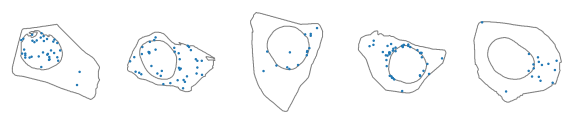

In [30]:
cells = data.obs['cell'].unique()
random_cells = np.random.choice(cells, size=5, replace=False).tolist()

# Plot some cells
bento.pl.plot_cells(data, cells=random_cells)

# Prepare features (wip)

In [ ]:
data = bento.tl.prepare_features(data, features=['ripley', 'distance', 'morphology', 'mask_fraction', 'indexes'])